# Analyse de la Qualité du Vin

## 1. Contexte et Problématique

### Domaine métier
Ce projet porte sur l'analyse de la qualité du vin, spécifiquement les vins portugais "Vinho Verde" (vin vert).

### Problématique
- **Objectif principal** : Modéliser les préférences du vin en utilisant les propriétés physicochimiques
- **Approche** : Régression et classification basées sur les données d'analyse sensorielle
- **Enjeu** : Prédire la qualité d'un vin à partir de ses caractéristiques physico-chimiques (sans information sur la variété de raisin, la marque, le prix, etc.)

### Origine des données
- **Source** : Dataset public de recherche (Cortez et al., 2009)
- **Création** : Paulo Cortez et al. - Université du Minho (Braga, Portugal) en 2009
- **Publication** : Decision Support Systems, Elsevier

### Variantes disponibles
- Vin rouge ("Vinho Verde" rouge)
- Vin blanc ("Vinho Verde" blanc)

In [16]:
import pandas as pd

df = pd.read_csv("../data/winequality-red.csv", sep=";")
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 2. Compréhension des Données

### 2.1 Structure générale
Les données sont organisées dans **2 fichiers CSV distincts** (séparés par des points-virgules):

In [17]:
import pandas as pd
import numpy as np

# Chargement des données
df_red = pd.read_csv("../data/winequality-red.csv", sep=";")
df_white = pd.read_csv("../data/winequality-white.csv", sep=";")

print("=" * 80)
print("DONNÉES - VIN ROUGE")
print("=" * 80)
print(f"Dimensions : {df_red.shape[0]} observations × {df_red.shape[1]} variables")
print(f"\nPremières lignes :")
print(df_red.head())

print("\n" + "=" * 80)
print("DONNÉES - VIN BLANC")
print("=" * 80)
print(f"Dimensions : {df_white.shape[0]} observations × {df_white.shape[1]} variables")
print(f"\nPremières lignes :")
print(df_white.head())

DONNÉES - VIN ROUGE
Dimensions : 1599 observations × 12 variables

Premières lignes :
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   



### 2.2 Variables et Descriptions

In [18]:
# Noms et descriptions des variables
variables_description = {
    "fixed acidity": "Acidité fixe (acides qui ne s'évaporent pas facilement)",
    "volatile acidity": "Acidité volatile (acides responsables du goût de vinaigre)",
    "citric acid": "Acide citrique (ajoute de la fraîcheur et du goût)",
    "residual sugar": "Sucre résiduel (sucre restant après fermentation)",
    "chlorides": "Chlorures (sel dans le vin)",
    "free sulfur dioxide": "Dioxyde de soufre libre (agent conservateur)",
    "total sulfur dioxide": "Dioxyde de soufre total",
    "density": "Densité (poids du vin par unité de volume)",
    "pH": "Acidité (échelle 0-14, < 7 = acide)",
    "sulphates": "Sulfates (additif antimicrobien)",
    "alcohol": "Alcool (% d'alcool)",
    "quality": "Qualité (score 0-10, basé sur évaluation sensorielle)"
}

print("=" * 80)
print("VARIABLES DU DATASET")
print("=" * 80)
for i, (var, desc) in enumerate(variables_description.items(), 1):
    print(f"{i:2d}. {var:25s} → {desc}")

print("\n" + "=" * 80)
print("CLASSIFICATION DES VARIABLES")
print("=" * 80)
print("\n📊 VARIABLES D'ENTRÉE (Features) - 11 variables physicochimiques:")
print("   • Acidité : fixed acidity, volatile acidity, citric acid, pH")
print("   • Sucres : residual sugar")
print("   • Minéraux : chlorides, sulphates")
print("   • Conservateurs : free sulfur dioxide, total sulfur dioxide")
print("   • Propriétés physiques : density, alcohol")
print("\n🎯 VARIABLE DE SORTIE (Target) - 1 variable sensorielle:")
print("   • quality : Score de qualité (0 = très mauvais, 10 = excellent)")

VARIABLES DU DATASET
 1. fixed acidity             → Acidité fixe (acides qui ne s'évaporent pas facilement)
 2. volatile acidity          → Acidité volatile (acides responsables du goût de vinaigre)
 3. citric acid               → Acide citrique (ajoute de la fraîcheur et du goût)
 4. residual sugar            → Sucre résiduel (sucre restant après fermentation)
 5. chlorides                 → Chlorures (sel dans le vin)
 6. free sulfur dioxide       → Dioxyde de soufre libre (agent conservateur)
 7. total sulfur dioxide      → Dioxyde de soufre total
 8. density                   → Densité (poids du vin par unité de volume)
 9. pH                        → Acidité (échelle 0-14, < 7 = acide)
10. sulphates                 → Sulfates (additif antimicrobien)
11. alcohol                   → Alcool (% d'alcool)
12. quality                   → Qualité (score 0-10, basé sur évaluation sensorielle)

CLASSIFICATION DES VARIABLES

📊 VARIABLES D'ENTRÉE (Features) - 11 variables physicochimiques:


### 2.3 Types de Données et Caractéristiques

In [19]:
print("=" * 80)
print("TYPES DE DONNÉES")
print("=" * 80)
print("\nVin Rouge:")
print(df_red.dtypes)
print("\nVin Blanc:")
print(df_white.dtypes)

print("\n" + "=" * 80)
print("STATISTIQUES DESCRIPTIVES - VIN ROUGE")
print("=" * 80)
print(df_red.describe().T)

print("\n" + "=" * 80)
print("STATISTIQUES DESCRIPTIVES - VIN BLANC")
print("=" * 80)
print(df_white.describe().T)

TYPES DE DONNÉES

Vin Rouge:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Vin Blanc:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

STATISTIQUES DESCRIPTIVES - VIN ROUGE
                       count       mean        std      min      25%  \
fixed acidity         1599.0   8.319637   1.741096  

## 3. Mode de Collecte des Données

### 3.1 Processus de collecte
- **Variables d'entrée** : Tests **objectifs et mesurables** en laboratoire (physicochimiques)
- **Variable de sortie** : Données **sensorielles** (qualité basée sur dégustation)
  - Chaque vin a été évalué par **au moins 3 experts** en dégustation
  - Score final = **médiane des évaluations** des experts
  - Échelle : 0 (très mauvais) à 10 (excellent)

### 3.2 Limitations et particularités
- ✅ **Données complètes** : Aucune valeur manquante
- ❌ **Données partielles** : Informations limitées pour préserver la confidentialité
  - Pas de données sur : variété de raisins, marque, prix de vente, région précise, etc.
- ⚠️ **Données déséquilibrées** : 
  - Beaucoup plus de vins « normaux » que de vins « excellents » ou « très mauvais »
  - Distribution des scores de qualité est asymétrique

### 3.3 Potentiel du dataset
- 🔬 Testé avec succès en machine learning (SVM donne les meilleurs résultats)
- 📊 Peut être traité comme un problème de **régression** (prédire la note exacte) ou de **classification** (prédire une catégorie)
- 🎯 Bon candidat pour : 
  - Sélection de variables (feature selection) - certaines variables sont corrélées
  - Détection d'anomalies (identifier les rares vins excellents ou mauvais)

In [20]:
print("=" * 80)
print("ANALYSE DÉTAILLÉE DE LA QUALITÉ")
print("=" * 80)

print("\n📌 VIN ROUGE - Distribution de la Qualité:")
print(df_red['quality'].value_counts().sort_index())
print(f"\nMoyenne : {df_red['quality'].mean():.2f} | Médiane : {df_red['quality'].median():.0f} | Mode : {df_red['quality'].mode()[0]:.0f}")

print("\n📌 VIN BLANC - Distribution de la Qualité:")
print(df_white['quality'].value_counts().sort_index())
print(f"\nMoyenne : {df_white['quality'].mean():.2f} | Médiane : {df_white['quality'].median():.0f} | Mode : {df_white['quality'].mode()[0]:.0f}")

print("\n" + "=" * 80)
print("DÉTECTION DE VALEURS MANQUANTES")
print("=" * 80)
print(f"\nVin Rouge - Valeurs manquantes : {df_red.isnull().sum().sum()} (Confirmé : ✅ Pas de données manquantes)")
print(f"Vin Blanc - Valeurs manquantes : {df_white.isnull().sum().sum()} (Confirmé : ✅ Pas de données manquantes)")

print("\n" + "=" * 80)
print("COMPARAISON ROUGE vs BLANC")
print("=" * 80)
comparison_data = {
    "Métrique": ["Nb observations", "Alcool (moy %)", "Densité (moy)", "Acidité pH (moy)", "Qualité (moy)"],
    "Vin Rouge": [
        f"{df_red.shape[0]}",
        f"{df_red['alcohol'].mean():.2f}",
        f"{df_red['density'].mean():.5f}",
        f"{df_red['pH'].mean():.2f}",
        f"{df_red['quality'].mean():.2f}"
    ],
    "Vin Blanc": [
        f"{df_white.shape[0]}",
        f"{df_white['alcohol'].mean():.2f}",
        f"{df_white['density'].mean():.5f}",
        f"{df_white['pH'].mean():.2f}",
        f"{df_white['quality'].mean():.2f}"
    ]
}
comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))

ANALYSE DÉTAILLÉE DE LA QUALITÉ

📌 VIN ROUGE - Distribution de la Qualité:
quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64

Moyenne : 5.64 | Médiane : 6 | Mode : 5

📌 VIN BLANC - Distribution de la Qualité:
quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: count, dtype: int64

Moyenne : 5.88 | Médiane : 6 | Mode : 6

DÉTECTION DE VALEURS MANQUANTES

Vin Rouge - Valeurs manquantes : 0 (Confirmé : ✅ Pas de données manquantes)
Vin Blanc - Valeurs manquantes : 0 (Confirmé : ✅ Pas de données manquantes)

COMPARAISON ROUGE vs BLANC
        Métrique Vin Rouge Vin Blanc
 Nb observations      1599      4898
  Alcool (moy %)     10.42     10.51
   Densité (moy)   0.99675   0.99403
Acidité pH (moy)      3.31      3.19
   Qualité (moy)      5.64      5.88


## 4. Résumé Exécutif

| Aspect | Détails |
|--------|---------|
| **Domaine** | Analyse sensorielle et prédiction de qualité de vin |
| **Datasets** | 2 datasets : vin rouge (1599 obs) + vin blanc (4898 obs) = **6497 observations** |
| **Variables** | 11 variables d'entrée + 1 variable cible = **12 variables totales** |
| **Types** | Toutes les variables sont **numériques (float/int)** |
| **Données manquantes** | ✅ **Aucune** |
| **Collecte** | Tests physicochimiques en labo + Évaluations sensorielles (≥3 experts) |
| **Cible (Quality)** | Score ordinal 0-10 basé sur consensus d'experts |
| **Déséquilibre** | Peu de vins excellents (9-10) et mauvais (3 ou moins) |
| **Format** | CSV séparé par **point-virgule (;)** |
| **Qualité données** | ⭐⭐⭐⭐⭐ Excellente (publique, citée 1000+ fois, bien documentée) |

## 5. Vérification qualité — Missing & Outliers

Cellules automatiques : calcul des valeurs manquantes, détection des outliers (IQR et z-score), et visualisations pour exploration rapide.

In [21]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Fonctions de QA depuis src/preprocessing.py
import sys, os
# Ensure project root is on sys.path so `src` package can be imported from the notebook
sys.path.append(str(Path('..').resolve()))
from src.preprocessing import load_data, data_quality_report, missing_summary, detect_outliers_iqr, detect_outliers_zscore, handle_missing, handle_outliers

DATA_DIR = Path('..') / 'data'
df = load_data(DATA_DIR / 'winequality-red.csv', DATA_DIR / 'winequality-white.csv')
print('Loaded combined dataframe:', df.shape)

# Rapport synthétique
report = data_quality_report(df)
print(f"Total rows: {report['rows']} | Total cols: {report['cols']}")
print('Total missing values:', report['missing_total'])
print('\nDtypes:')
display(pd.Series(report['dtypes']).to_frame('dtype'))


Loaded combined dataframe: (6497, 13)
Total rows: 6497 | Total cols: 13
Total missing values: 0

Dtypes:


,dtype
fixed acidity,float64
volatile acidity,float64
citric acid,float64
residual sugar,float64
chlorides,float64
free sulfur dioxide,float64
total sulfur dioxide,float64
density,float64
pH,float64
sulphates,float64


In [22]:
# Tableaux détaillés : missing summary + outliers (IQR & z-score)
miss_df = missing_summary(df)
iqr_df = detect_outliers_iqr(df)
z_df = detect_outliers_zscore(df)

print('--- Missing summary (top) ---')
display(miss_df.head(20))

print('--- Outliers (IQR) ---')
display(iqr_df)

print('--- Outliers (z-score) ---')
display(z_df)


--- Missing summary (top) ---


,missing_count,missing_percent
fixed acidity,0,0.0
volatile acidity,0,0.0
citric acid,0,0.0
residual sugar,0,0.0
chlorides,0,0.0
free sulfur dioxide,0,0.0
total sulfur dioxide,0,0.0
density,0,0.0
pH,0,0.0
sulphates,0,0.0


--- Outliers (IQR) ---


,column,outliers,outlier_percent,lower_bound,upper_bound
2,citric acid,509,7.834,0.040000,0.600000
1,volatile acidity,377,5.803,-0.025000,0.655000
0,fixed acidity,357,5.495,4.450000,9.650000
4,chlorides,286,4.402,-0.002500,0.105500
11,quality,228,3.509,3.500000,7.500000
9,sulphates,191,2.940,0.175000,0.855000
3,residual sugar,118,1.816,-7.650000,17.550000
8,pH,73,1.124,2.795000,3.635000
5,free sulfur dioxide,62,0.954,-19.000000,77.000000
6,total sulfur dioxide,10,0.154,-41.500000,274.500000


--- Outliers (z-score) ---


,column,outliers_z,outlier_percent_z
0,fixed acidity,128,1.970
4,chlorides,107,1.647
1,volatile acidity,95,1.462
9,sulphates,75,1.154
5,free sulfur dioxide,36,0.554
11,quality,35,0.539
8,pH,33,0.508
2,citric acid,28,0.431
3,residual sugar,26,0.400
6,total sulfur dioxide,8,0.123


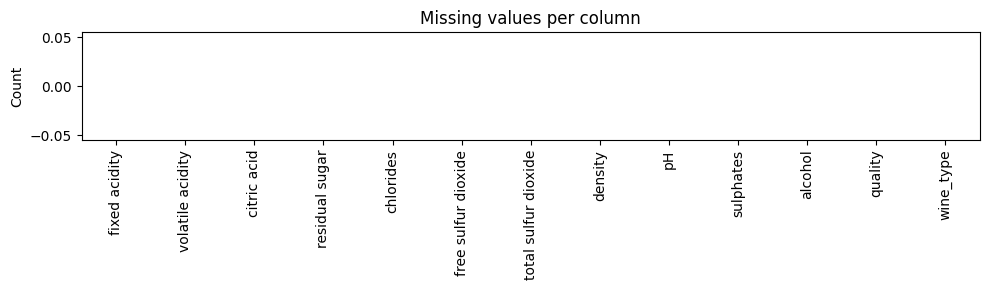

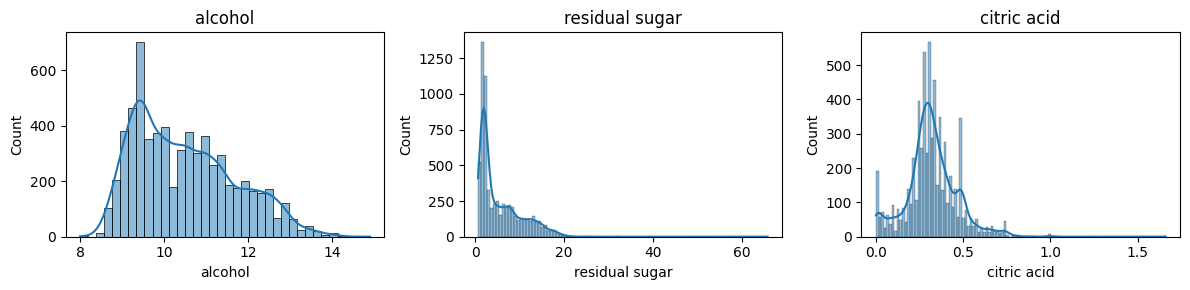

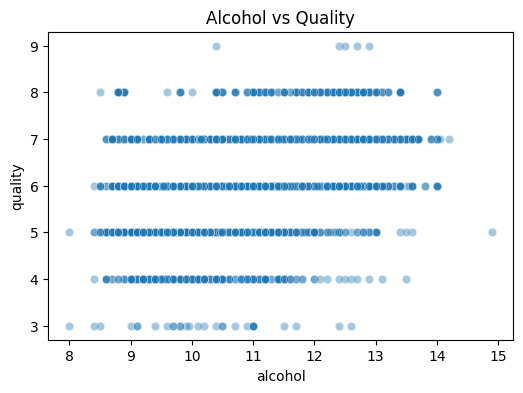

In [23]:
# Visualisations rapides
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Missing values bar (useful if any missing exist)
fig, ax = plt.subplots(1, 1, figsize=(10, 3))
miss_df['missing_count'].plot(kind='bar', ax=ax, color='C1')
ax.set_title('Missing values per column')
ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

# Histograms for selected features
sel = ['alcohol', 'residual sugar', 'citric acid']
fig, axes = plt.subplots(1, len(sel), figsize=(12, 3))
for a, col in zip(axes, sel):
    sns.histplot(df[col], kde=True, ax=a, color='C0')
    a.set_title(col)
plt.tight_layout()
plt.show()

# Scatter: alcohol vs quality
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='alcohol', y='quality', alpha=0.4)
plt.title('Alcohol vs Quality')
plt.show()


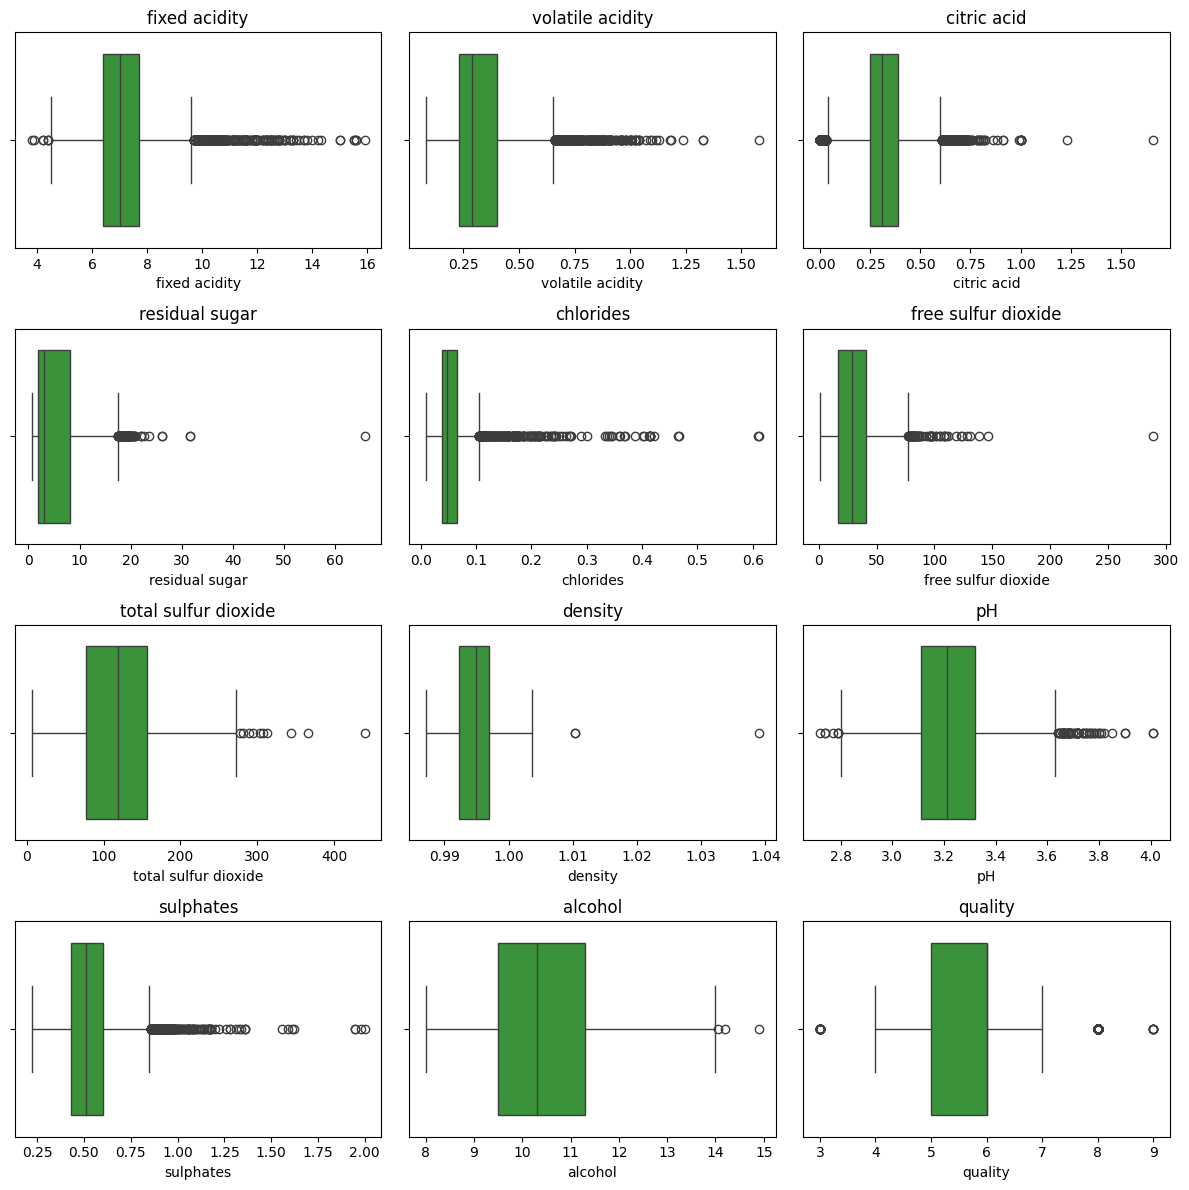

Before capping - alcohol max: 14.9
After capping  - alcohol max: 14.000000000000002


,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.142173,1.066080,4.45000,6.40000,7.00000,7.70000,9.650000
volatile acidity,6497.0,0.332612,0.144376,0.08000,0.23000,0.29000,0.40000,0.655000
citric acid,6497.0,0.316180,0.131856,0.04000,0.25000,0.31000,0.39000,0.600000
residual sugar,6497.0,5.407727,4.613702,0.60000,1.80000,3.00000,8.10000,17.550000
chlorides,6497.0,0.053230,0.021289,0.00900,0.03800,0.04700,0.06500,0.105500
free sulfur dioxide,6497.0,30.339541,16.904806,1.00000,17.00000,29.00000,41.00000,77.000000
total sulfur dioxide,6497.0,115.671926,56.256191,6.00000,77.00000,118.00000,156.00000,274.500000
density,6497.0,0.994689,0.002942,0.98711,0.99234,0.99489,0.99699,1.003965
pH,6497.0,3.217638,0.157901,2.79500,3.11000,3.21000,3.32000,3.635000
sulphates,6497.0,0.526667,0.131196,0.22000,0.43000,0.51000,0.60000,0.855000


In [24]:
# Boxplots (IQR visual) pour toutes les colonnes numériques (compact grid)
num = df.select_dtypes(include=[np.number])
cols = num.columns.tolist()
n = len(cols)
ncols = 3
nrows = (n + ncols - 1) // ncols
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 4, nrows * 3))
axes = axes.flatten()
for i, c in enumerate(cols):
    sns.boxplot(x=num[c], ax=axes[i], color='C2')
    axes[i].set_title(c)
# Hide unused axes
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)
plt.tight_layout()
plt.show()

# Exemple d'application : caper les outliers puis comparer describe()
df_capped = handle_outliers(df, method='cap')
print('Before capping - alcohol max:', df['alcohol'].max())
print('After capping  - alcohol max:', df_capped['alcohol'].max())
display(df_capped.describe().T)


## 6. Mitigation de la colinéarité — recommandation et exemple

- Observations : `density` et `residual sugar` présentent des VIFs élevés; il est souvent pertinent de retirer ou combiner la variable la plus problématique (ici `density`) avant d'entraîner un modèle linéaire simple, ou d'utiliser une méthode régulière (Ridge/Lasso) ou PCA.
- Exemple ci-dessous : calcul des VIFs, suppression de `density` si nécessaire, et projection PCA (3 composantes).

In [25]:
# Exemple: calcul des VIF, suppression d'une variable à vif élevé, et PCA (3 composants)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

num = df.select_dtypes(include=[np.number]).copy()
features = [c for c in num.columns if c != 'quality']
X = num[features].fillna(0)

# Compute VIFs using linear regression R^2
vifs = []
for col in features:
    y = X[col].values
    X_other = X.drop(columns=[col]).values
    model = LinearRegression()
    model.fit(X_other, y)
    r2 = model.score(X_other, y)
    vif = np.inf if np.isclose(1 - r2, 0) else 1.0 / (1.0 - r2)
    vifs.append((col, float(vif)))
vif_df = pd.DataFrame(vifs, columns=['feature', 'vif']).sort_values('vif', ascending=False).reset_index(drop=True)
print('VIFs (desc):')
display(vif_df)

# Suggest drop if vif > 5
to_drop = vif_df[vif_df['vif'] > 5]['feature'].tolist()
print('Suggested to drop (vif>5):', to_drop)

# If there is at least one, drop the first and recompute VIFs as a quick check
if to_drop:
    drop_col = to_drop[0]
    print(f'\nDropping {drop_col} and recomputing VIFs...')
    X_reduced = X.drop(columns=[drop_col])
    vifs2 = []
    for col in X_reduced.columns:
        y = X_reduced[col].values
        X_other = X_reduced.drop(columns=[col]).values
        model = LinearRegression()
        model.fit(X_other, y)
        r2 = model.score(X_other, y)
        vif = np.inf if np.isclose(1 - r2, 0) else 1.0 / (1.0 - r2)
        vifs2.append((col, float(vif)))
    display(pd.DataFrame(vifs2, columns=['feature', 'vif']).sort_values('vif', ascending=False).reset_index(drop=True))

# PCA example (3 components) on standardized features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=3)
pcs = pca.fit_transform(X_scaled)
print('\nPCA explained variance ratio (3 components):', pca.explained_variance_ratio_)
proj = pd.DataFrame(pcs[:, :3], columns=['PC1', 'PC2', 'PC3'])
display(proj.head())


VIFs (desc):


,feature,vif
0,density,15.914501
1,residual sugar,7.228979
2,fixed acidity,4.896925
3,alcohol,4.782130
4,total sulfur dioxide,2.937601
5,pH,2.536522
6,free sulfur dioxide,2.135481
7,volatile acidity,1.949413
8,chlorides,1.631958
9,citric acid,1.608220


Suggested to drop (vif>5): ['density', 'residual sugar']

Dropping density and recomputing VIFs...


,feature,vif
0,total sulfur dioxide,2.843819
1,free sulfur dioxide,2.135374
2,fixed acidity,1.783515
3,volatile acidity,1.703665
4,citric acid,1.608022
5,chlorides,1.564130
6,residual sugar,1.511206
7,pH,1.415649
8,alcohol,1.410019
9,sulphates,1.347969



PCA explained variance ratio (3 components): [0.2754426  0.22671146 0.14148609]


,PC1,PC2,PC3
0,-3.205996,0.416523,-2.722237
1,-3.039051,1.107462,-2.046952
2,-3.071893,0.878964,-1.742580
3,-1.571262,2.112545,2.592917
4,-3.205996,0.416523,-2.722237


## 7. Qu'est-ce qui fait qu'un vin est de bonne qualité ?

Objectif de cette cellule : lister et visualiser les features les plus liées à `quality` en combinant plusieurs approches : corrélation, comparaison moyenne (vins bons vs autres), et importances issues d'un modèle (RandomForest) + coefficients d'un modèle linéaire régularisé (LogisticRegression sur label binaire).

Model accuracy (RandomForest CV): 0.888 ± 0.010
Model accuracy (LogisticRegression CV): 0.818 ± 0.010
Top features par RandomForest importance:


,importance
alcohol,0.159895
density,0.120207
volatile acidity,0.087884
chlorides,0.086472
residual sugar,0.082252
total sulfur dioxide,0.082235
sulphates,0.081086
pH,0.079679
free sulfur dioxide,0.076187
citric acid,0.076171


Top features par corr with binary label:


,abs_corr
alcohol,0.390486
density,0.275441
chlorides,0.161781
volatile acidity,0.151714
residual sugar,0.063992
citric acid,0.054444
total sulfur dioxide,0.051226
fixed acidity,0.049447
sulphates,0.033971
pH,0.028149


Summary table:


,corr_with_quality,corr_with_label,mean_diff_abs,rf_importance,lr_coef_abs
alcohol,0.444319,0.390486,1.171898,0.159895,0.701437
density,-0.305858,0.275441,0.002078,0.120207,0.876266
volatile acidity,-0.265699,0.151714,0.062849,0.087884,0.552508
chlorides,-0.200666,0.161781,0.014261,0.086472,0.217710
residual sugar,-0.036980,0.063992,0.766091,0.082252,0.813933
total sulfur dioxide,-0.041385,0.051226,7.285381,0.082235,0.327191
sulphates,0.038485,0.033971,0.012720,0.081086,0.365005
pH,0.019506,0.028149,0.011388,0.079679,0.373376
free sulfur dioxide,0.055463,0.014767,0.659518,0.076187,0.224458
citric acid,0.085532,0.054444,0.019908,0.076171,0.045095


/var/folders/11/f72wbpk55n5_c8y3shf_d8600000gn/T/ipykernel_66198/810518887.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rf_importances.head(8).values, y=rf_importances.head(8).index, palette='viridis')


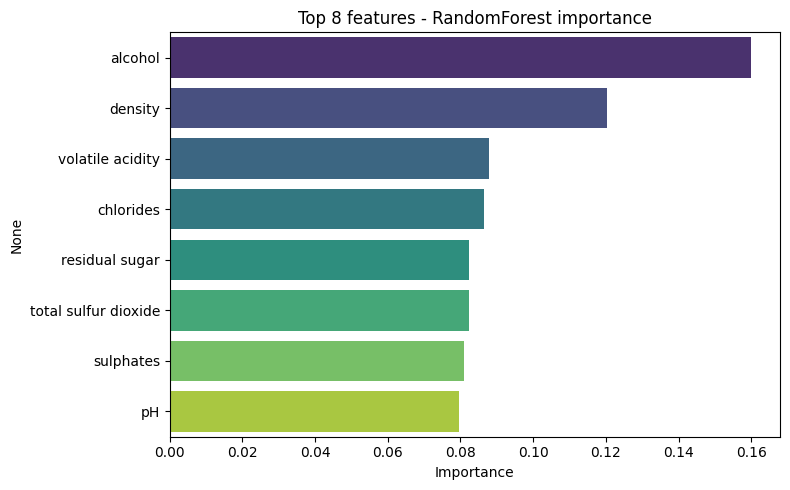

/var/folders/11/f72wbpk55n5_c8y3shf_d8600000gn/T/ipykernel_66198/810518887.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_label.head(8).values, y=corr_with_label.head(8).index, palette='magma')


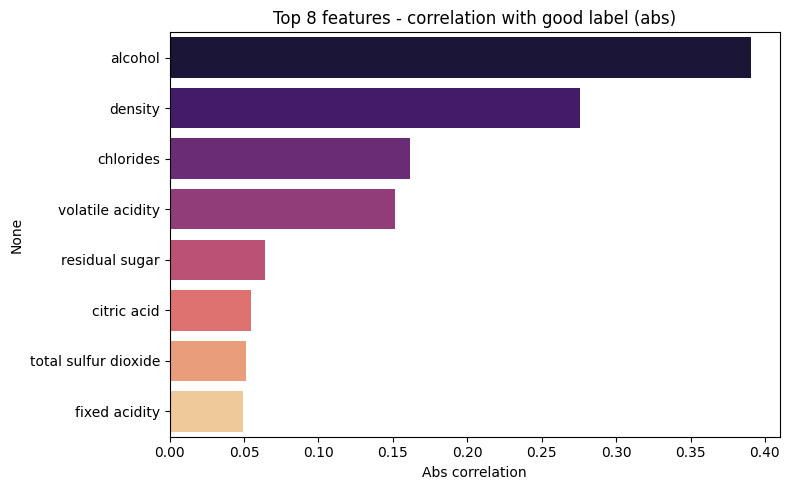

Saved feature_vs_quality_summary.csv in ../data/qa_reports


In [26]:
# Analyse pratique : quelles variables sont associées à une bonne qualité
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold
from IPython.display import display
from pathlib import Path

# Préparer données
num = df.select_dtypes(include=[np.number]).copy()
features = [c for c in num.columns if c != 'quality']
X = num[features].fillna(0)
y_reg = num['quality'] if 'quality' in num.columns else None
# binaire : good = quality >= 7 (même seuil que précédemment)
y = (y_reg >= 7).astype(int)

# 1) Corrélation (continu target)
corr_with_quality = X.join(y_reg).corr()['quality'].drop('quality').sort_values(key=lambda s: s.abs(), ascending=False)

# 2) Moyennes : good vs not-good
means = X.join(y).groupby(y.name).mean() if hasattr(y, 'name') else X.groupby(y).mean()
mean_diff = (means.loc[1] - means.loc[0]).abs().sort_values(ascending=False)

# 3) Point-biserial / correlation with binary label (same as pearson with binary)
corr_with_label = X.corrwith(y).abs().sort_values(ascending=False)

# 4) RandomForest importances (classification)
rf = RandomForestClassifier(n_estimators=200, random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rf, X, y, cv=cv, scoring='accuracy')
rf.fit(X, y)
rf_importances = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)

# 5) LogisticRegression coefficients (standardized)
sc = StandardScaler()
Xs = sc.fit_transform(X)
lr = LogisticRegression(max_iter=2000, C=1.0, solver='liblinear')
lr_scores = cross_val_score(lr, Xs, y, cv=cv, scoring='accuracy')
lr.fit(Xs, y)
lr_coefs = pd.Series(lr.coef_.ravel(), index=features).abs().sort_values(ascending=False)

# Résumé synthétique
summary = pd.DataFrame({
    'corr_with_quality': corr_with_quality,
    'corr_with_label': corr_with_label,
    'mean_diff_abs': mean_diff,
    'rf_importance': rf_importances,
    'lr_coef_abs': lr_coefs
}).fillna(0)
summary = summary.loc[features].sort_values('rf_importance', ascending=False)

print(f'Model accuracy (RandomForest CV): {scores.mean():.3f} ± {scores.std():.3f}')
print(f'Model accuracy (LogisticRegression CV): {lr_scores.mean():.3f} ± {lr_scores.std():.3f}')

print('Top features par RandomForest importance:')
display(rf_importances.head(10).to_frame('importance'))

print('Top features par corr with binary label:')
display(corr_with_label.head(10).to_frame('abs_corr'))

print('Summary table:')
display(summary.head(12))

# Visualisation combinée
plt.figure(figsize=(8,5))
sns.barplot(x=rf_importances.head(8).values, y=rf_importances.head(8).index, palette='viridis')
plt.title('Top 8 features - RandomForest importance')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x=corr_with_label.head(8).values, y=corr_with_label.head(8).index, palette='magma')
plt.title('Top 8 features - correlation with good label (abs)')
plt.xlabel('Abs correlation')
plt.tight_layout()
plt.show()

# Save summary
out_dir = Path('..') / 'data' / 'qa_reports'
out_dir.mkdir(parents=True, exist_ok=True)
summary.to_csv(out_dir / 'feature_vs_quality_summary.csv')
print('Saved feature_vs_quality_summary.csv in', out_dir)
